In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar

import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 22})
sns.set(font_scale=2.4)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/results/backprop1000NewLossFunctionHeterFFLimitedRange"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"$J_{EE}$": params_to_J_scalar(J_array[0]), 
                 "$J_{EI}$": params_to_J_scalar(J_array[1]), 
                 "$J_{IE}$": params_to_J_scalar(J_array[2]),
                 "$J_{II}$": params_to_J_scalar(J_array[3]),
                 "$P_{EE}$": params_to_P_scalar(P_array[0]),
                 "$P_{EI}$": params_to_P_scalar(P_array[1]),
                 "$P_{IE}$": params_to_P_scalar(P_array[2]),
                 "$P_{II}$": params_to_P_scalar(P_array[3]),
                 "$w_{EE}$": params_to_w_scalar(w_array[0]),
                 "$w_{EI}$": params_to_w_scalar(w_array[1]),
                 "$w_{IE}$": params_to_w_scalar(w_array[2]),
                 "$w_{II}$": params_to_w_scalar(w_array[3]),
                 "$q_{ff}$": heter_ff,
                 "loss": loss}
        
        data.append(datum)

In [5]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

42
{'$J_{EE}$': 9.50503449139399, '$J_{EI}$': 8.00105836366855, '$J_{IE}$': 32.743791949347624, '$J_{II}$': 26.862513006654652, '$P_{EE}$': 0.007944127760178707, '$P_{EI}$': 0.5822668314396163, '$P_{IE}$': 0.019367380481920604, '$P_{II}$': 0.41668785726819246, '$w_{EE}$': 176.91291401121845, '$w_{EI}$': 47.208509328307336, '$w_{IE}$': 162.24577820993377, '$w_{II}$': 171.97758768416676, '$q_{ff}$': 0.626748, 'loss': 0.023086857050657272}
{'$J_{EE}$': 0.9028653786325408, '$J_{EI}$': 36.667890906466575, '$J_{IE}$': 39.38885082322568, '$J_{II}$': 8.07799426325298, '$P_{EE}$': 0.024018342645160055, '$P_{EI}$': 0.017210289285743845, '$P_{IE}$': 0.04377013092484756, '$P_{II}$': 0.027192071898883428, '$w_{EE}$': 21.231223559516685, '$w_{EI}$': 8.753470174707699, '$w_{IE}$': 29.038117687476063, '$w_{II}$': 97.04654314802501, '$q_{ff}$': 0.327988, 'loss': 0.015612076967954636}
{'$J_{EE}$': 38.81736190326072, '$J_{EI}$': 37.88192815313521, '$J_{IE}$': 36.159214814501986, '$J_{II}$': 39.9975878452

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,9.505034,8.001058,32.743792,26.862513,0.007944,0.582267,0.019367,0.416688,176.912914,47.208509,162.245778,171.977588,0.626748,0.023087
1,0.902865,36.667891,39.388851,8.077994,0.024018,0.017210,0.043770,0.027192,21.231224,8.753470,29.038118,97.046543,0.327988,0.015612
2,38.817362,37.881928,36.159215,39.997588,0.592169,0.399573,0.592898,0.599813,13.792755,174.246619,27.816633,175.277233,0.161305,0.012841
3,0.526689,1.416822,0.976948,9.433381,0.538395,0.394758,0.580771,0.524843,19.708886,170.757149,133.614676,94.620315,0.523166,0.020204
4,0.902865,36.667891,39.388851,8.077994,0.024018,0.017210,0.043770,0.027192,21.231224,8.753470,29.038118,97.046543,0.327988,0.015612


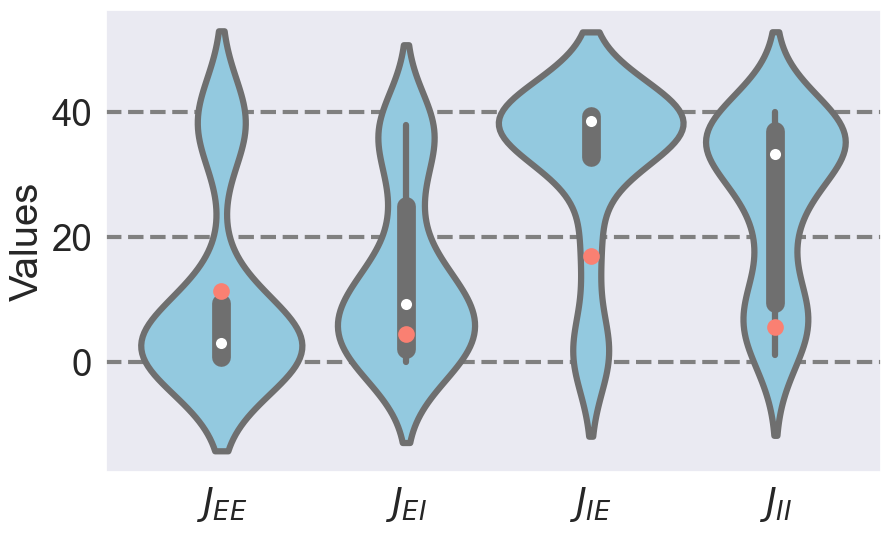

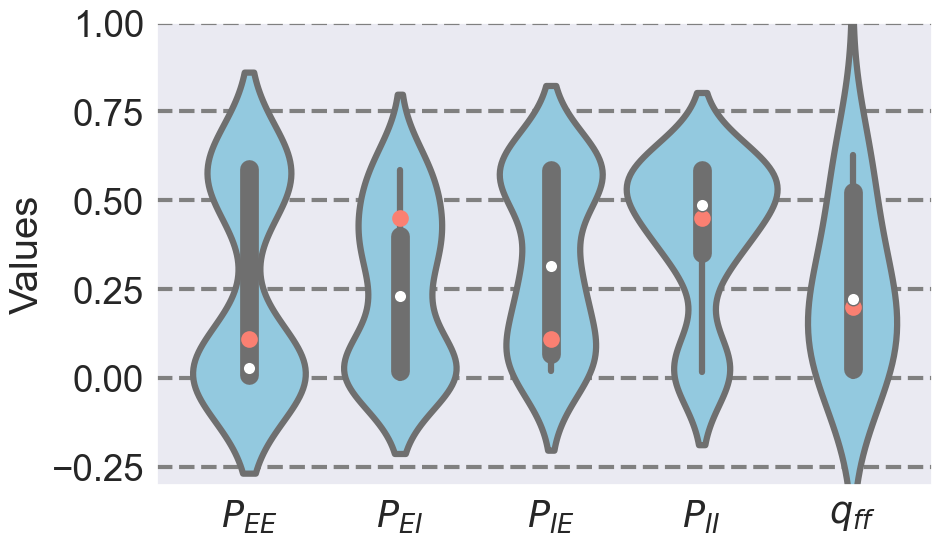

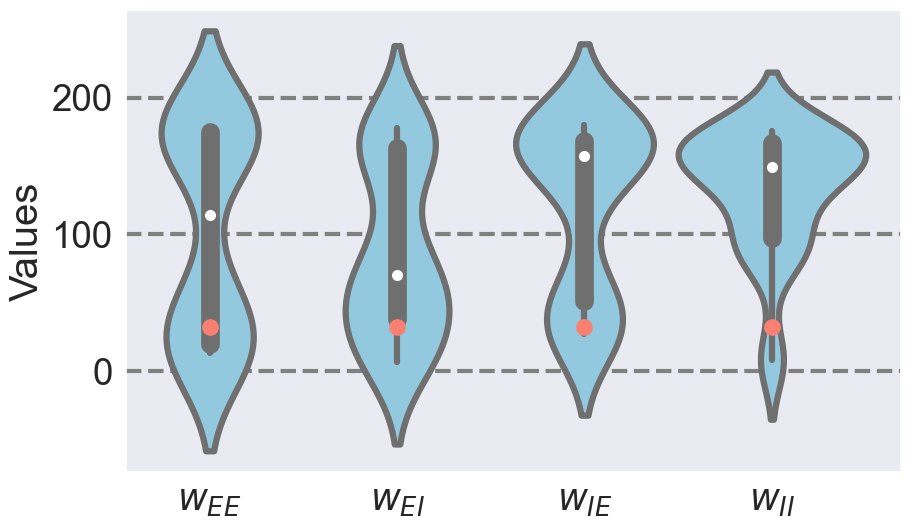

In [6]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45, 0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

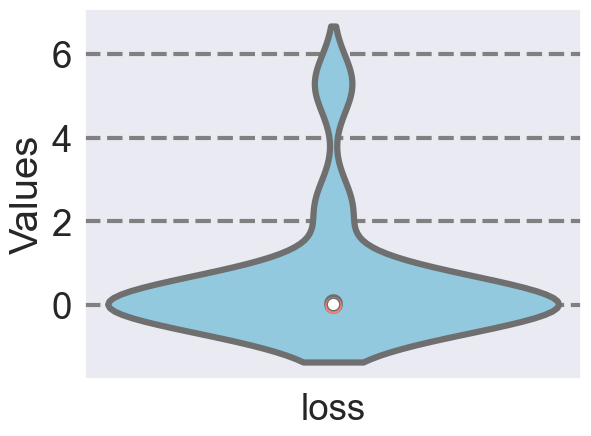

In [7]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [6.437301749429025e-07]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [11]:
# remove the data with only low loss

data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                    heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"$J_{EE}$": params_to_J_scalar(J_array[0]), 
                 "$J_{EI}$": params_to_J_scalar(J_array[1]), 
                 "$J_{IE}$": params_to_J_scalar(J_array[2]),
                 "$J_{II}$": params_to_J_scalar(J_array[3]),
                 "$P_{EE}$": params_to_P_scalar(P_array[0]),
                 "$P_{EI}$": params_to_P_scalar(P_array[1]),
                 "$P_{IE}$": params_to_P_scalar(P_array[2]),
                 "$P_{II}$": params_to_P_scalar(P_array[3]),
                 "$w_{EE}$": params_to_w_scalar(w_array[0]),
                 "$w_{EI}$": params_to_w_scalar(w_array[1]),
                 "$w_{IE}$": params_to_w_scalar(w_array[2]),
                 "$w_{II}$": params_to_w_scalar(w_array[3]),
                 "$q_{ff}$": heter_ff,
                 "loss": loss}
        if loss < 0.04:
            data.append(datum)

In [12]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

{'$J_{EE}$': 9.50503449139399, '$J_{EI}$': 8.00105836366855, '$J_{IE}$': 32.743791949347624, '$J_{II}$': 26.862513006654652, '$P_{EE}$': 0.007944127760178707, '$P_{EI}$': 0.5822668314396163, '$P_{IE}$': 0.019367380481920604, '$P_{II}$': 0.41668785726819246, '$w_{EE}$': 176.91291401121845, '$w_{EI}$': 47.208509328307336, '$w_{IE}$': 162.24577820993377, '$w_{II}$': 171.97758768416676, '$q_{ff}$': 0.626748, 'loss': 0.023086857050657272}
{'$J_{EE}$': 0.9028653786325408, '$J_{EI}$': 36.667890906466575, '$J_{IE}$': 39.38885082322568, '$J_{II}$': 8.07799426325298, '$P_{EE}$': 0.024018342645160055, '$P_{EI}$': 0.017210289285743845, '$P_{IE}$': 0.04377013092484756, '$P_{II}$': 0.027192071898883428, '$w_{EE}$': 21.231223559516685, '$w_{EI}$': 8.753470174707699, '$w_{IE}$': 29.038117687476063, '$w_{II}$': 97.04654314802501, '$q_{ff}$': 0.327988, 'loss': 0.015612076967954636}
{'$J_{EE}$': 38.81736190326072, '$J_{EI}$': 37.88192815313521, '$J_{IE}$': 36.159214814501986, '$J_{II}$': 39.9975878452687

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,9.505034,8.001058,32.743792,26.862513,0.007944,0.582267,0.019367,0.416688,176.912914,47.208509,162.245778,171.977588,0.626748,0.023087
1,0.902865,36.667891,39.388851,8.077994,0.024018,0.017210,0.043770,0.027192,21.231224,8.753470,29.038118,97.046543,0.327988,0.015612
2,38.817362,37.881928,36.159215,39.997588,0.592169,0.399573,0.592898,0.599813,13.792755,174.246619,27.816633,175.277233,0.161305,0.012841
3,0.526689,1.416822,0.976948,9.433381,0.538395,0.394758,0.580771,0.524843,19.708886,170.757149,133.614676,94.620315,0.523166,0.020204
4,0.902865,36.667891,39.388851,8.077994,0.024018,0.017210,0.043770,0.027192,21.231224,8.753470,29.038118,97.046543,0.327988,0.015612


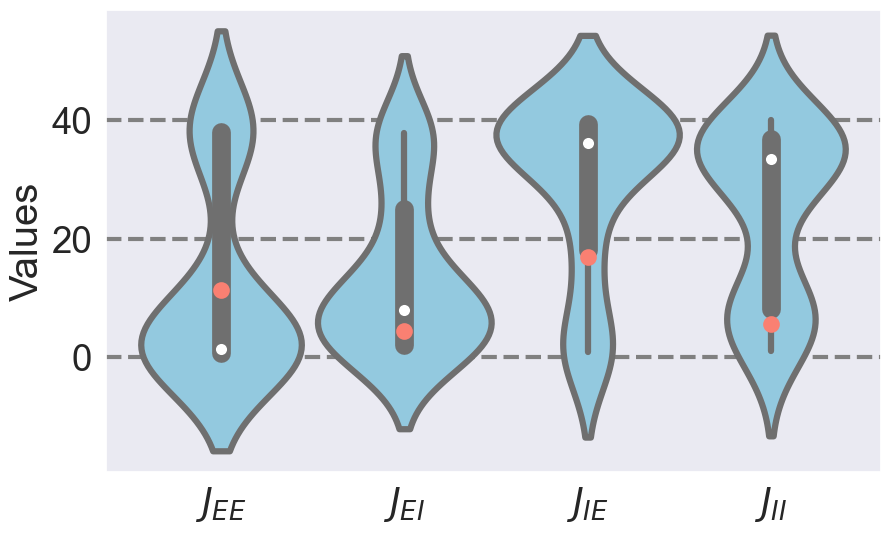

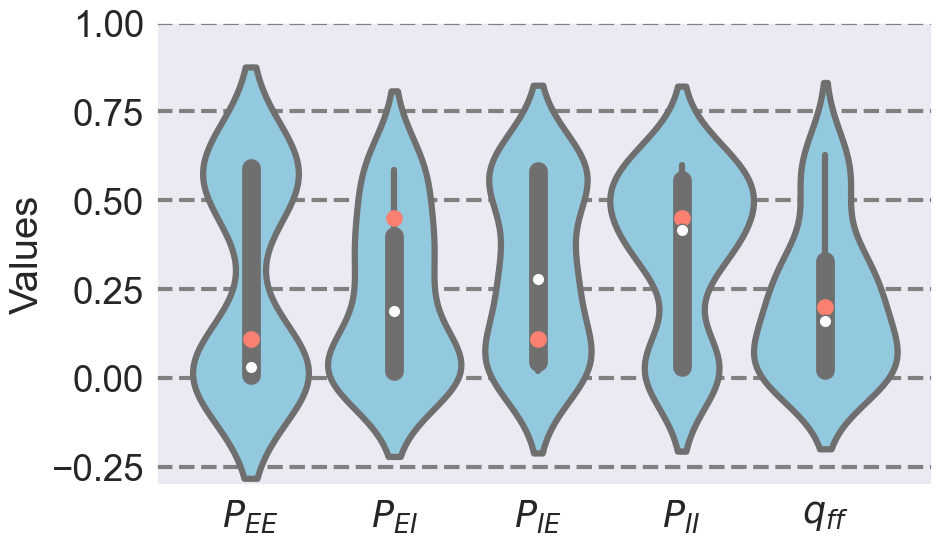

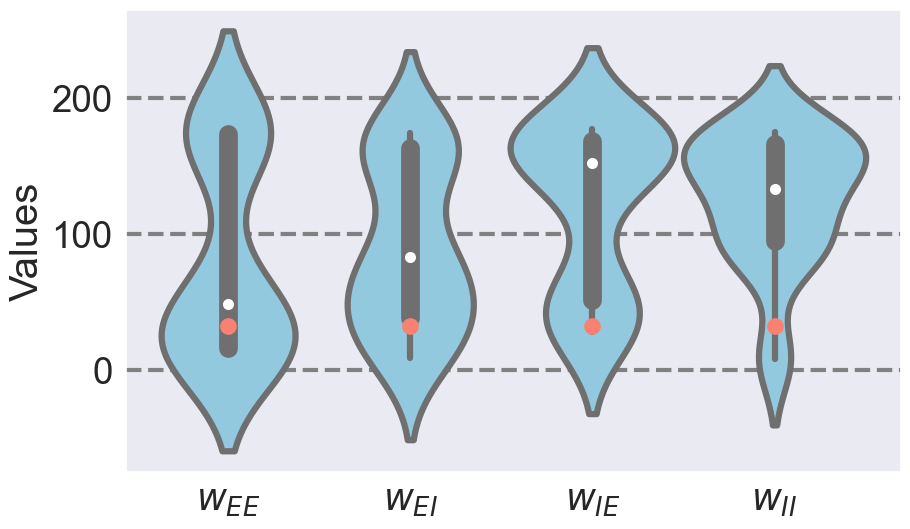

In [13]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45, 0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

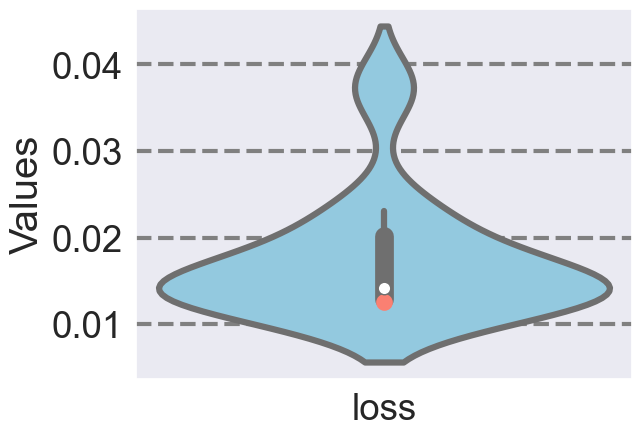

In [15]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.012507867068052292]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()